In [1]:
# Works best with jupyter-notebook

In [1]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math
import numpy as np

from spatialmath import *
from spatialmath.base import *

import roboticstoolbox as rtb
from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 6.10 Joint Trajectory Interpolation

We have looked at ctraj, here we quickly explore joint trajectory interpolation.

In [2]:
puma = rtb.models.DH.Puma560()

Plot with joint angles at zero.

<IPython.core.display.Javascript object>


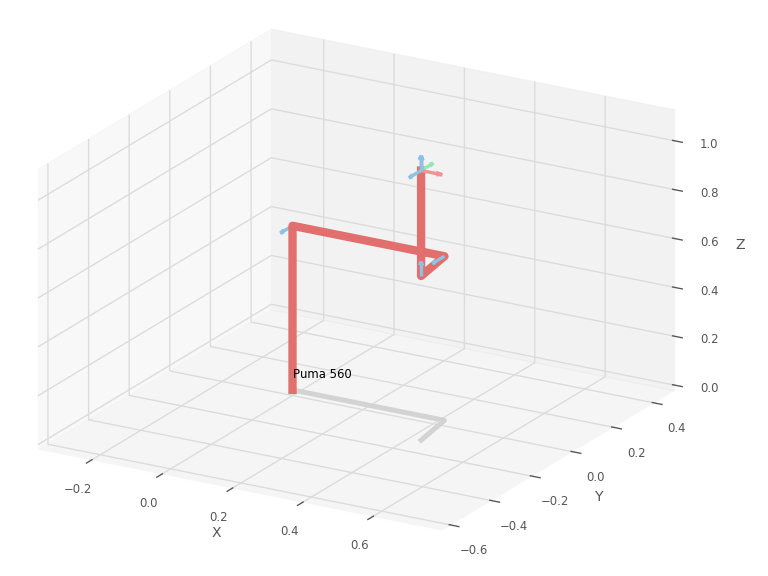

In [3]:
puma.plot(puma.qz);

Let us now designate a desired end-effector pose that we would like the puma robot to reach. 

In [16]:
T0 = SE3(0.4, 0.1, 1)*SE3().RPY([0, -20, 0], unit='deg')
T1 = SE3(0.8, -0.2, 0.5)*SE3().RPY([45, 0, 0], unit='deg')

In [17]:
sol0 = puma.ikine_a(T0)
sol1 = puma.ikine_a(T1)

In [18]:
#out = tr.jtraj(puma.qz, sol1.q, tv=100)
out = tr.jtraj(sol0.q, sol1.q, tv=100)

In [19]:
print(out)

Trajectory created by jtraj: 100 time steps x 6 axes


In [21]:
puma.plot(out.y)